# Merging DataFrames with pandas

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ax.plot" data-toc-modified-id="ax.plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ax.plot</a></span></li><li><span><a href="#Plotting-time-series" data-toc-modified-id="Plotting-time-series-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting time-series</a></span></li><li><span><a href="#annotate" data-toc-modified-id="annotate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>annotate</a></span><ul class="toc-item"><li><span><a href="#Joining-DataFrames" data-toc-modified-id="Joining-DataFrames-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Joining DataFrames</a></span></li><li><span><a href="#Ordered-merges" data-toc-modified-id="Ordered-merges-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ordered merges</a></span></li></ul></li><li><span><a href="#Case-Study---Summer-Olympics" data-toc-modified-id="Case-Study---Summer-Olympics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Case Study - Summer Olympics</a></span><ul class="toc-item"><li><span><a href="#Quantifying-Performance" data-toc-modified-id="Quantifying-Performance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Quantifying Performance</a></span></li></ul></li></ul></div>

- learn how to create visualizations for different kinds of data and how to customize, automate, and share these visualizations.

In [41]:
# Import pandas
import pandas as pd 

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Summer_Olympic_medals/Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Summer_Olympic_medals/Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Summer_Olympic_medals/Gold.csv')

# Print the first five rows of gold

for i in [gold, silver, bronze]:
    i.pop('Country')

total = pd.merge(\
                 pd.merge(gold, silver, on='NOC', suffixes=('_g', '_s')),
                 bronze, on='NOC')
total.columns=['NOC', 'G', 'S', 'B']
total = total.dropna(subset=['G'])

total = total[(total.G>=200) & (total.S>=200) & (total.B>=200)]

## ax.plot

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

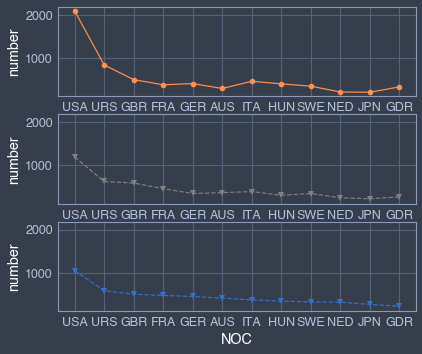

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,1, sharey=True)


ax[0].plot(total["NOC"], total["G"], color='y', marker='o')
ax[1].plot(total["NOC"], total["S"], color='gray',marker='v', linestyle='--')
ax[2].plot(total["NOC"], total["B"], color='b',marker='v', linestyle='--')

for i in range(3):
    
    ax[i].set_xlabel('NOC', color='white')

    ax[i].set_ylabel('number', color='white')

plt.show()

## Plotting time-series

In [54]:
import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('Sales/sales-jan-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('Sales/sales-feb-2015.csv', parse_dates=True, index_col='Date')

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('Sales/sales-mar-2015.csv', parse_dates=True, index_col='Date')

q1 = pd.concat([jan, feb, mar])

In [70]:
q1 = q1.sort_index()

In [71]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)
  # Set the x-axis label
  axes.set_xlabel(xlabel)
  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)
  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

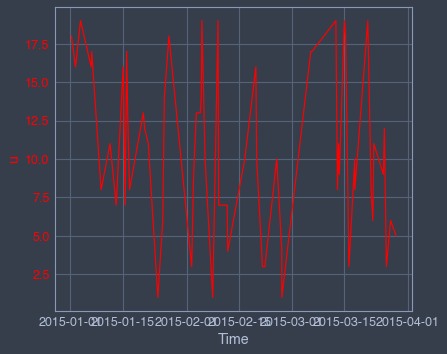

In [75]:
fig, ax=plt.subplots()
plot_timeseries(ax, q1.index, q1.Units, 'red', 'Time', 'u')

## annotate

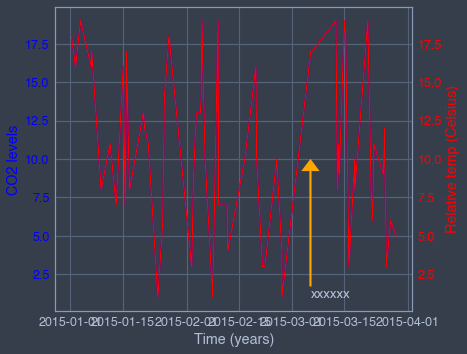

In [94]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, q1.index, q1.Units, 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, q1.index, q1.Units, 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate("xxxxxx", xy=(pd.Timestamp('2015-03-06'), 10), xytext=(pd.Timestamp('2015-03-06'), 1),
             arrowprops={#'arrowstyle': '-|>',
                         'color': 'orange',
                         'width': 2,
                        'headwidth' : 18})

plt.show()

## 
- Which should you use?
    - `df1.append(df2)`: 
        - stacking vertically 
    - `pd.concat([df1, df2])`:
        - stacking many horizontally or vertically
        - simple inner/outer joins on Indexes
    - `df1.join(df2)`: 
        - inner/outer/left/right joins on Indexes
    - `pd.merge([df1, df2])`:
        - many joins on multiple columns

In [104]:
# Import pandas
import pandas as pd 

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Summer_Olympic_medals/Bronze.csv', index_col=['NOC', 'Country'])

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Summer_Olympic_medals/Silver.csv', index_col=['NOC', 'Country'])

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Summer_Olympic_medals/Gold.csv', index_col=['NOC', 'Country'])

In [111]:
m_c = pd.concat([gold, silver, bronze], keys=['gold', 'silver', 'bronze'], axis=1)
m_c
m_c.loc[('USA', 'United States'), ('gold', 'Total')] 

2088.0

In [116]:
m_j = gold.join(silver, how='outer', lsuffix='_gold', rsuffix='_silver').join(bronze, how='outer', rsuffix='_bronze')
m_j
m_j.columns = ['Total_gold', 'Total_silver', 'Total_bronze']
m_j
m_j.loc[('USA', 'United States'), 'Total_gold'] 

2088.0

In [119]:
# Import pandas
import pandas as pd 

# Read 'Bronze.csv' into a DataFrame: bronze
bronze1 = pd.read_csv('Summer_Olympic_medals/Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver1 = pd.read_csv('Summer_Olympic_medals/Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold1 = pd.read_csv('Summer_Olympic_medals/Gold.csv')

m_m = pd.merge(
            pd.merge(gold1, silver1, on=['NOC', 'Country'] ,\
            suffixes=('_gold', '_silver')), 
            bronze1, on=['NOC', 'Country'] ,\
            suffixes=('', '_bronze'))

m_m
m_m = m_m.set_index(['NOC', 'Country'])
m_m.columns = ['Total_gold', 'Total_silver', 'Total_bronze']
m_m

,,Total_gold,Total_silver,Total_bronze
NOC,Country,,,
USA,United States,2088.0,1195.0,1052.0
URS,Soviet Union,838.0,627.0,584.0
GBR,United Kingdom,498.0,591.0,505.0
FRA,France,378.0,461.0,475.0
GER,Germany,407.0,350.0,454.0
...,...,...,...,...
SEN,Senegal,NaN,1.0,NaN
SUD,Sudan,NaN,1.0,NaN
TGA,Tonga,NaN,1.0,NaN


### Ordered merges

In [133]:
auto = pd.read_csv('automobiles.csv', parse_dates=[6])
oil = pd.read_csv('oil_price.csv', parse_dates=[0])
auto.info(), oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg       392 non-null float64
cyl       392 non-null int64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
yr        392 non-null datetime64[ns]
origin    392 non-null object
name      392 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 27.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
Date     156 non-null datetime64[ns]
Price    156 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


(None, None)

In [134]:

# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

# Print the tail of merged
print(merged.tail())

# Resample merged: yearly
yearly = merged.resample('A', on='Date')[['mpg','Price']].mean()

# Print yearly
print(yearly)

# print yearly.corr()
print(yearly.corr())

      mpg  cyl  displ  hp  weight  accel         yr  origin             name  \
387  27.0    4  140.0  86    2790   15.6 1982-01-01      US  ford mustang gl   
388  44.0    4   97.0  52    2130   24.6 1982-01-01  Europe        vw pickup   
389  32.0    4  135.0  84    2295   11.6 1982-01-01      US    dodge rampage   
390  28.0    4  120.0  79    2625   18.6 1982-01-01      US      ford ranger   
391  31.0    4  119.0  82    2720   19.4 1982-01-01      US       chevy s-10   

          Date  Price  
387 1982-01-01  33.85  
388 1982-01-01  33.85  
389 1982-01-01  33.85  
390 1982-01-01  33.85  
391 1982-01-01  33.85  
                  mpg  Price
Date                        
1970-12-31  17.689655   3.35
1971-12-31  21.111111   3.56
1972-12-31  18.714286   3.56
1973-12-31  17.100000   3.56
1974-12-31  22.769231  10.11
1975-12-31  20.266667  11.16
1976-12-31  21.573529  11.16
1977-12-31  23.375000  13.90
1978-12-31  24.061111  14.85
1979-12-31  25.093103  14.85
1980-12-31  33.803704  32.5

## Case Study - Summer Olympics

In [1]:
#Import pandas
import pandas as pd

# Create file path: file_path
file_path = \
'Summer_Olympic_medals/Summer_Olympic_medalists_1896_to_2008_-_EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
print(editions.head())


   Edition  Grand Total       City         Country
0     1896          151     Athens          Greece
1     1900          512      Paris          France
2     1904          470  St. Louis   United States
3     1908          804     London  United Kingdom
4     1912          885  Stockholm          Sweden


In [2]:
# Import pandas
import pandas as pd

# Create the file path: file_path
file_path = \
'Summer_Olympic_medals/Summer_Olympic_medalists_1896_to_2008_-_IOC_COUNTRY_CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path, )

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country','NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND


### Quantifying Performance

In [3]:
fn=\
'Summer_Olympic_medals/'+\
'Summer_Olympic_medalists_1896_to_2008_-_ALL_MEDALISTS.tsv'
medals = pd.read_csv(fn, sep='\t', skiprows=4)
medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]

In [4]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index='Edition', values='Athlete',\
columns='NOC', aggfunc='count')

# Print the first & last 5 rows of medal_counts
medal_counts.loc[1896:1908, :'AUT']

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT
Edition,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0


In [5]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']
print(totals.loc[1896:1908])
# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
fractions.loc[1896:1908, :'AUT']

Edition
1896    151
1900    512
1904    470
1908    804
Name: Grand Total, dtype: int64


NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT
Edition,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244


In [6]:
# df.expanding, 將 df 中的每一 col 由 第一個 開始考慮, 回傳到各 row 時的 計算結果
# 
fractions.expanding().mean().loc[1896:1908, :'AUT']
# fractions.expanding().sum().loc[1896:1908, :'AUT']

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT
Edition,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.022416
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.015653
1908,NaN,NaN,NaN,0.023632,NaN,NaN,0.011505,0.012051


In [7]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index('Edition')

# Print first & last 5 rows of fractions_change
fractions_change.loc[0:4, :'AUT']

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438


In [14]:
# editions.head(), ioc_codes.head()

In [13]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
hosts.head()

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE


In [19]:
# Import pandas
import pandas as pd

# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped.NOC == 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


In [21]:
merged

,Edition,NOC,Change
0,1956,AUS,54.615063
1,2000,AUS,12.554986
2,1920,BEL,54.757887
3,1976,CAN,-2.143977
4,2008,CHN,13.251332
5,1992,ESP,32.943248
6,1952,FIN,0.121662
7,1900,FRA,198.002486
8,1924,FRA,2.046362
9,1972,FRG,35.228623


In [22]:
# Import pandas
import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts)

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

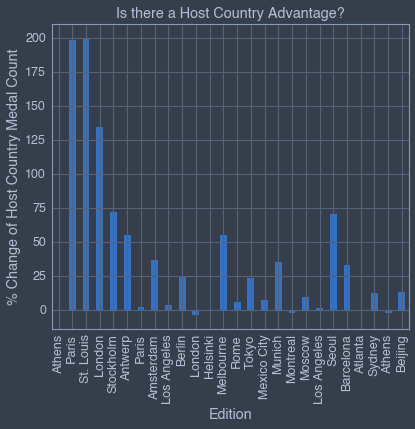

In [27]:
# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()